In [2]:
#read data into dataframes
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pylab as plt
df1 = pd.read_csv("C:/Users/heypu/OneDrive/Desktop/DATA1030-Fall2022/Flight-Prices/data/Clean_Dataset.csv")
df2 = pd.read_csv("C:/Users/heypu/OneDrive/Desktop/DATA1030-Fall2022/Flight-Prices/data/business.csv")
df3 = pd.read_csv("C:/Users/heypu/OneDrive/Desktop/DATA1030-Fall2022/Flight-Prices/data/economy.csv")

In [3]:
#inspect cleaned data
df1.loc[:,df1.columns != 'price']

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49


In [4]:
#inspect data collected on business class
df2.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [5]:
#inspect data collected on economy class
df3.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [6]:
#since we only use cleaned data in this project, inspect datatype of df1
print(df1.dtypes) 

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


In [7]:
#drop useless column Unnamed:0
df1=df1.drop('Unnamed: 0',axis=1)
df1

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
#count airline numbers by company
df_airlines=df1.groupby(['flight','airline'],as_index=False).count()
df_airlines.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

In [10]:
#compare business class vs economy
df_classes=df1.groupby(['flight','airline','class'],as_index=False).count()
df_classes['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64


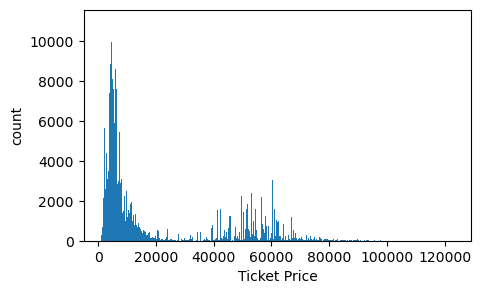

In [11]:
#inspect target varaible
print(df1['price'].describe())
plt.figure(figsize=(5,3))

df1['price'].plot.hist(bins = int(np.sqrt(df1.shape[0])))             
plt.xlabel('Ticket Price')
plt.ylabel('count')
plt.show()

Text(0.5, 0, 'Ticket Price in Rupee')

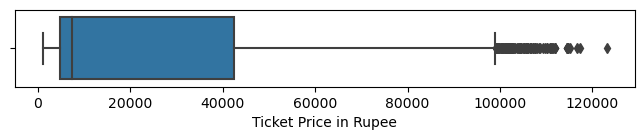

In [12]:
plt.figure(figsize = (8,1))
sns.boxplot(x = 'price', data = df1)
plt.xlabel('Ticket Price in Rupee')

Text(0.5, 1.0, 'Ticket Price Distribution')

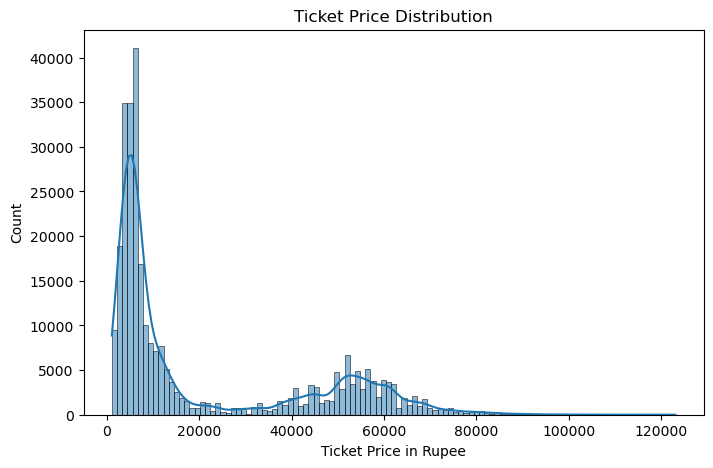

In [13]:
plt.figure(figsize = (8,5))
sns.histplot(x = 'price', data = df1, kde = True)
plt.xlabel('Ticket Price in Rupee')
plt.title('Ticket Price Distribution')

In [14]:
df1[(df1['price']>100000)].head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216025,Vistara,UK-817,Delhi,Evening,two_or_more,Morning,Kolkata,Business,17.58,4,100395
216095,Vistara,UK-963,Delhi,Morning,one,Evening,Kolkata,Business,8.00,5,101369
216096,Vistara,UK-811,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,10.92,5,117307


count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64


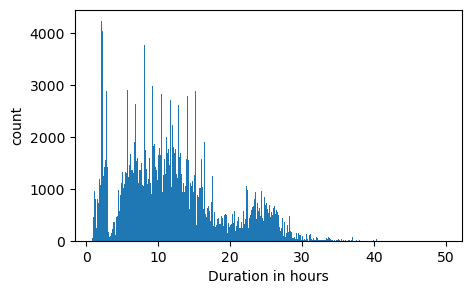

In [15]:
#inspect duration
print(df1['duration'].describe())
plt.figure(figsize=(5,3))

df1['duration'].plot.hist(bins = int(np.sqrt(df1.shape[0])))             
plt.xlabel('Duration in hours')
plt.ylabel('count')
plt.show()

In [16]:
df1[(df1['duration']>30)].head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
114,Air_India,AI-429,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,1,24540
357,Air_India,AI-429,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,3,15405
546,Air_India,AI-429,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,4,15720
724,Air_India,AI-429,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,5,15405
907,Air_India,AI-429,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,6,15405


Text(0.5, 1.0, 'Airlines vs Ticket Price for Economy Class')

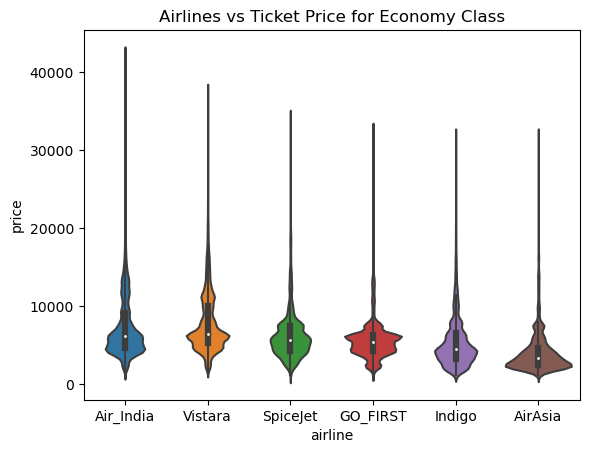

In [17]:
sns.violinplot(y = "price", x = "airline",data = df1.loc[df1["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen")
plt.title("Airlines vs Ticket Price for Economy Class")

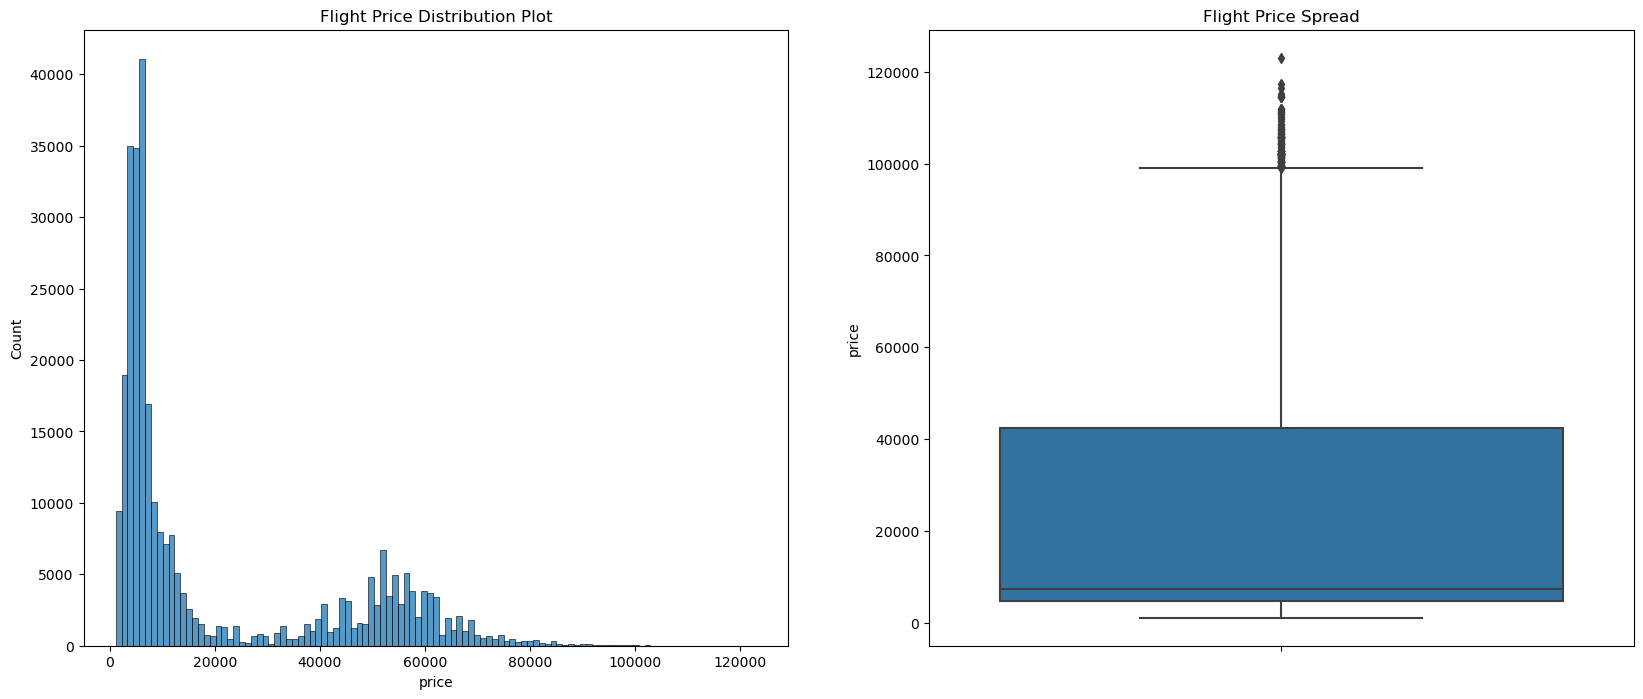

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Flight Price Distribution Plot')
sns.histplot(df1.price)

plt.subplot(1,2,2)
plt.title('Flight Price Spread')
sns.boxplot(y=df1.price)

plt.show()

Text(0.5, 1.0, 'Airlines vs Ticket Price for Economy Class')

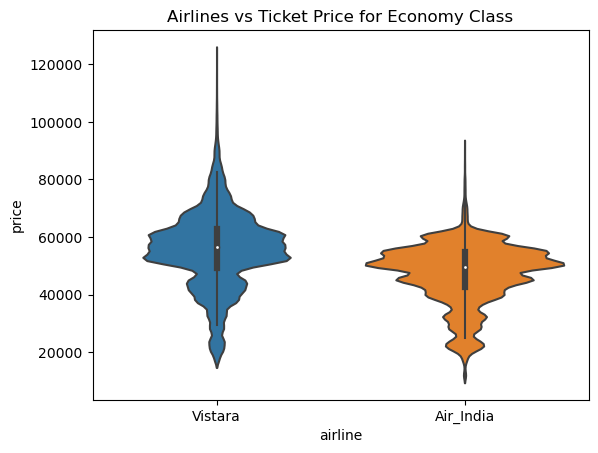

In [19]:
sns.violinplot(y = "price", x = "airline",data = df1.loc[df1["class"]=='Business'].sort_values("price", ascending = False), kind="boxen",)
plt.title("Airlines vs Ticket Price for Economy Class")

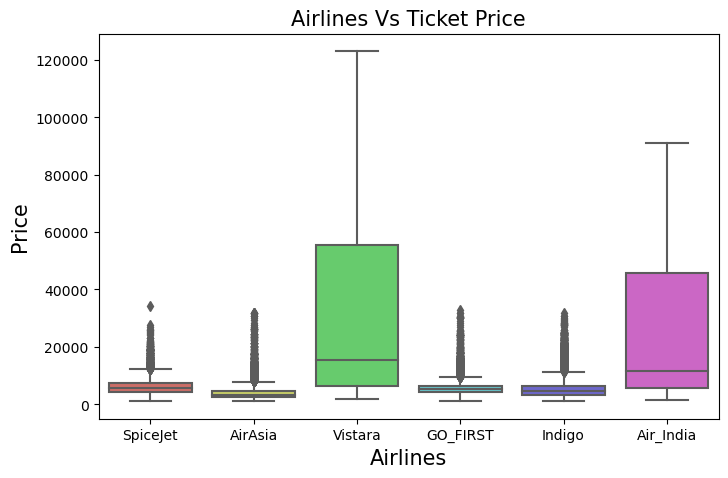

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df1['airline'],y=df1['price'],palette='hls')
plt.title('Airlines Vs Ticket Price',fontsize=15)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

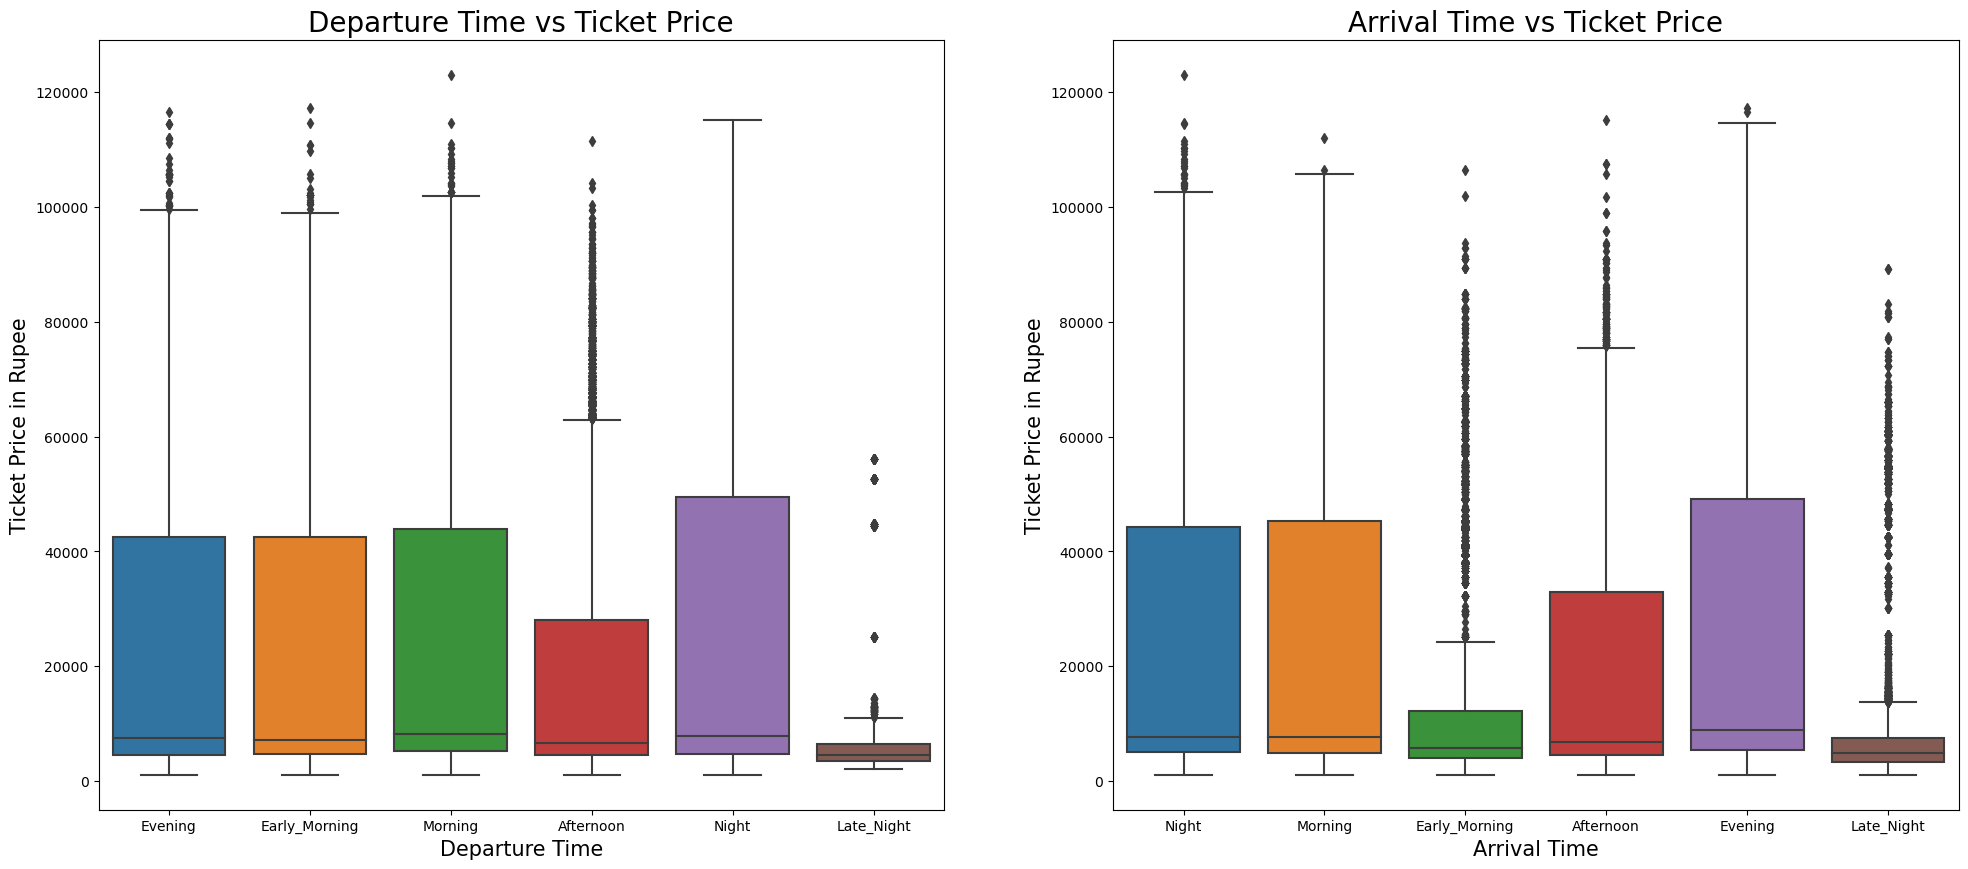

In [21]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df1)
plt.title('Departure Time vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Ticket Price in Rupee',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df1)
plt.title('Arrival Time vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Ticket Price in Rupee',fontsize=15)
plt.show()

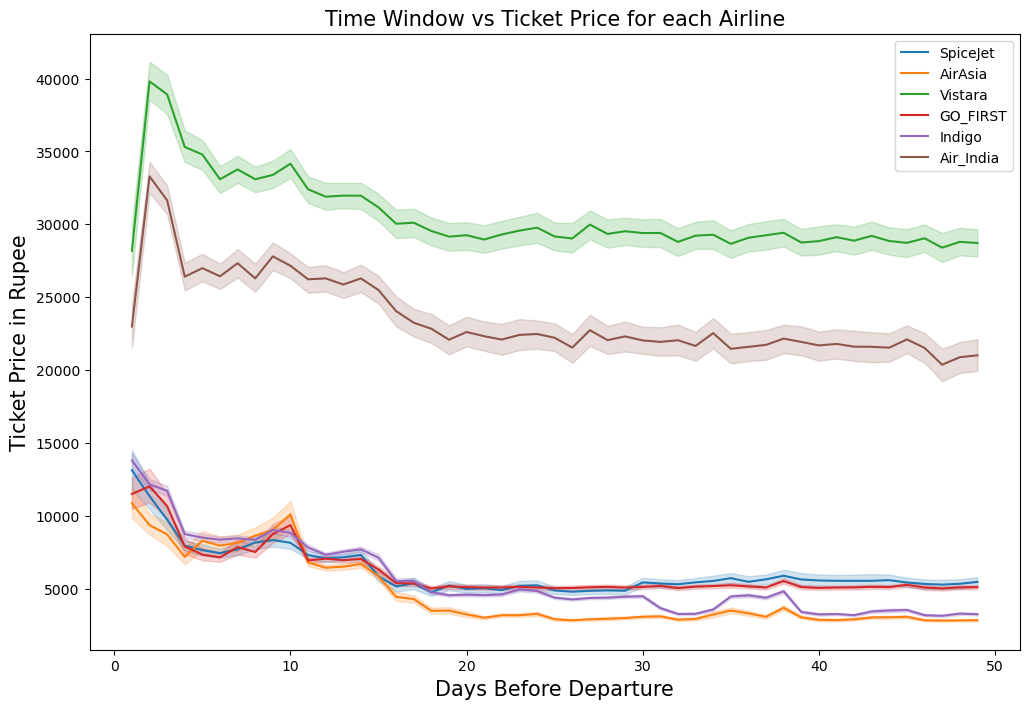

In [22]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1,x='days_left',y='price',hue='airline')
plt.title('Time Window vs Ticket Price for each Airline',fontsize=15)
plt.legend()
plt.xlabel('Days Before Departure',fontsize=15)
plt.ylabel('Ticket Price in Rupee',fontsize=15)
plt.show()

Text(0, 0.5, 'Ticket Price in Rupee')

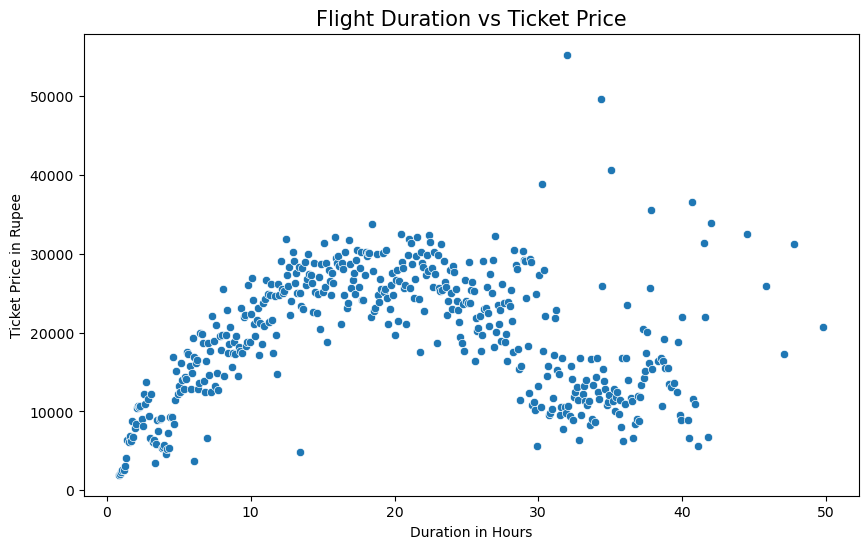

In [23]:
df_temp = df1.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Flight Duration vs Ticket Price",fontsize=15)
plt.xlabel('Duration in Hours')
plt.ylabel('Ticket Price in Rupee')

In [24]:
#set up splitting function
from sklearn.model_selection import train_test_split 
def basic_split(X,y,train_size,val_size,test_size,random_state):
    
    # test the inputs
    if not train_size + val_size + test_size == 1:
        raise ValueError('The sum of train_size, val_size, test_size is not 1')
    if not type(random_state) == int:
        raise ValueError('random_state is not an integar')

    # perform basic split
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = train_size,random_state = random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = val_size/(1-train_size),\
                                                    random_state = random_state)
    
    # test the outputs
    expectation = {X_train.shape[0]:train_size, y_train.shape[0]:train_size, X_val.shape[0]:val_size,\
                   y_val.shape[0]:val_size, X_test.shape[0]:test_size, y_test.shape[0]:test_size}
    total_length = X.shape[0]
    for output_length, expected_size in list(expectation.items()):
        if output_length < (expected_size*total_length - 1) or output_length > (expected_size*total_length + 1):
            raise ValueError('Output size is off')
            
    return X_train,y_train,X_val,y_val,X_test,y_test 

#split into 80-10-10  
y = df1['price']
X = df1.loc[:,df1.columns != 'Unnamed: 0']
X = df1.loc[:,df1.columns != 'price']
X_train,y_train,X_val,y_val,X_test,y_test = basic_split(X,y,0.8,0.1,0.1,42)

print("X_train:\n","shape:",X_train.shape)
print("\nX_val:\n","shape:",X_val.shape)
print("\nX_test:\n","shape:",X_test.shape)
print("\ny_train:\n","shape:",y_train.shape)
print("\ny_val:\n","shape:",y_val.shape)
print("\ny_test:\n","shape:",y_test.shape)

X_train:
 shape: (240122, 10)

X_val:
 shape: (30015, 10)

X_test:
 shape: (30016, 10)

y_train:
 shape: (240122,)

y_val:
 shape: (30015,)

y_test:
 shape: (30016,)


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

onehot_ftrs = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
minmax_ftrs = ['duration','days_left']


#Collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

#Do transforming
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

#Inspect datasets are in right shape after transforming
print(X_train_prep.shape)
print(X_train_prep)

#Make np arrays backinto dataframe
feature_names = preprocessor.get_feature_names_out()
ready_X_train = pd.DataFrame(X_train_prep,columns=feature_names)
ready_X_val = pd.DataFrame(X_val_prep,columns=feature_names)
ready_X_test = pd.DataFrame(X_test_prep,columns=feature_names)

print("\n preprocessed X_train: \n",ready_X_train.shape)
print("\n preprocessed X_val: \n",ready_X_val.shape)
print("\n preprocessed X_test: \n",ready_X_test.shape)

(240122, 37)
[[0.         1.         0.         ... 1.         0.37938776 0.10416667]
 [0.         0.         0.         ... 1.         0.12591837 0.25      ]
 [0.         1.         0.         ... 0.         0.41510204 0.89583333]
 ...
 [0.         1.         0.         ... 1.         0.26204082 0.58333333]
 [0.         0.         1.         ... 1.         0.15306122 0.79166667]
 [0.         1.         0.         ... 1.         0.39469388 0.33333333]]

 preprocessed X_train: 
 (240122, 37)

 preprocessed X_val: 
 (30015, 37)

 preprocessed X_test: 
 (30016, 37)


In [26]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[],'std of Adj_R2':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score,std of Adj_R2


In [27]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)


# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(ready_X_train, y_train)
    
    # Predict the model with validation? data

    y_pred = models.predict(ready_X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

C:\ProgramData\Anaconda3\envs\data\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4566.367
Mean Squared Error (MSE): 46165140.822
Root Mean Squared Error (RMSE): 6794.493
R2_score: 0.910383
Root Mean Squared Log Error (RMSLE): 8.824
Mean Absolute Percentage Error (MAPE): 46.38 %
Adj R Square:  0.91038
------------------------------------------------------------------------------------------------------------


C:\Users\heypu\AppData\Local\Temp\ipykernel_29144\2234073051.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1174.171
Mean Squared Error (MSE): 12617472.985
Root Mean Squared Error (RMSE): 3552.108
R2_score: 0.975507
Root Mean Squared Log Error (RMSLE): 8.175
Mean Absolute Percentage Error (MAPE): 7.24 %
Adj R Square:  0.975506
------------------------------------------------------------------------------------------------------------


C:\Users\heypu\AppData\Local\Temp\ipykernel_29144\2234073051.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1080.851
Mean Squared Error (MSE): 7892389.135
Root Mean Squared Error (RMSE): 2809.34
R2_score: 0.984679
Root Mean Squared Log Error (RMSLE): 7.941
Mean Absolute Percentage Error (MAPE): 6.84 %
Adj R Square:  0.984678
------------------------------------------------------------------------------------------------------------


C:\Users\heypu\AppData\Local\Temp\ipykernel_29144\2234073051.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1915.59
Mean Squared Error (MSE): 15497418.353
Root Mean Squared Error (RMSE): 3936.676
R2_score: 0.969916
Root Mean Squared Log Error (RMSLE): 8.278
Mean Absolute Percentage Error (MAPE): 11.52 %
Adj R Square:  0.969915
------------------------------------------------------------------------------------------------------------


C:\Users\heypu\AppData\Local\Temp\ipykernel_29144\2234073051.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 1133.081
Mean Squared Error (MSE): 8989153.962
Root Mean Squared Error (RMSE): 2998.192
R2_score: 0.98255
Root Mean Squared Log Error (RMSLE): 8.006
Mean Absolute Percentage Error (MAPE): 7.3 %
Adj R Square:  0.982549
------------------------------------------------------------------------------------------------------------


C:\Users\heypu\AppData\Local\Temp\ipykernel_29144\2234073051.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\ProgramData\Anaconda3\envs\data\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Model Name:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Mean Absolute Error (MAE): 1947.99
Mean Squared Error (MSE): 11814747.741
Root Mean Squared Error (RMSE): 3437.259
R2_score: 0.977065
Root Mean Squared Log Error (RMSLE): 8.142
Mean Absolute Percentage Error (MAPE): 14.43 %
Adj R Square:  0.977064
------------------------------------------------------------------------------------------------------------


C:\Users\heypu\AppData\Local\Temp\ipykernel_29144\2234073051.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 1104.691
Mean Squared Error (MSE): 8332765.981
Root Mean Squared Error (RMSE): 2886.653
R2_score: 0.983824
Root Mean Squared Log Error (RMSLE): 7.968
Mean Absolute Percentage Error (MAPE): 7.05 %
Adj R Square:  0.983823
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 4561.698
Mean Squared Error (MSE): 46157125.362
Root Mean Squared Error (RMSE): 6793.904
R2_score: 0.910399
Root Mean Squared Log Error (RMSLE): 8.824
Mean Absolute Percentage Error (MAPE): 46.29 %
Adj R Square:  0.910396
------------------------------------------------------------------------------------------------------------


C:\Users\heypu\AppData\Local\Temp\ipykernel_29144\2234073051.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\heypu\AppData\Local\Temp\ipykernel_29144\2234073051.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 4561.622
Mean Squared Error (MSE): 46157173.403
Root Mean Squared Error (RMSE): 6793.907
R2_score: 0.910399
Root Mean Squared Log Error (RMSLE): 8.824
Mean Absolute Percentage Error (MAPE): 46.29 %
Adj R Square:  0.910396
------------------------------------------------------------------------------------------------------------


C:\Users\heypu\AppData\Local\Temp\ipykernel_29144\2234073051.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [28]:
models=['LinearRegression','RandomForestRegressor','KNeighborsRegressor','XGBRegressor','ExtraTreesRegressor']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
#result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
#result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
#result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,R2_score
0,KNeighborsRegressor,0.984678,2809.339626,7.892389e+06,0.984679
1,ExtraTreesRegressor,0.982549,2998.191782,8.989154e+06,0.982550
2,RandomForestRegressor,0.975506,3552.108245,1.261747e+07,0.975507
3,XGBRegressor,0.969915,3936.676054,1.549742e+07,0.969916
4,LinearRegression,0.910380,6794.493419,4.616514e+07,0.910383


In [29]:
#Trainig the model with
modelKNN.fit(ready_X_train, y_train)
    
# Predict the model with test data

y_pred = modelKNN.predict(ready_X_test)

In [30]:
# Creating a Back up File
df_bk=df1.copy()

In [31]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)
result

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
16,Air_India,AI-887,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.08,1,5955,5955,5955.0
22,GO_FIRST,G8-103,Delhi,Evening,one,Morning,Mumbai,Economy,15.67,1,5954,5954,8863.2
33,Vistara,UK-817,Delhi,Evening,one,Morning,Mumbai,Economy,16.17,1,12150,12150,15247.8
41,Air_India,AI-502,Delhi,Afternoon,one,Morning,Mumbai,Economy,19.08,1,12150,12150,12210.0
44,Air_India,AI-479,Delhi,Night,one,Afternoon,Mumbai,Economy,17.75,1,12215,12215,13226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300133,Vistara,UK-834,Chennai,Evening,one,Afternoon,Hyderabad,Business,19.17,49,51457,51457,63091.8
300141,Air_India,AI-430,Chennai,Morning,one,Night,Hyderabad,Business,13.67,49,51345,51345,48962.4
300144,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Business,18.92,49,51345,51345,51345.0
300145,Air_India,AI-430,Chennai,Morning,one,Morning,Hyderabad,Business,23.08,49,51345,51345,52916.6


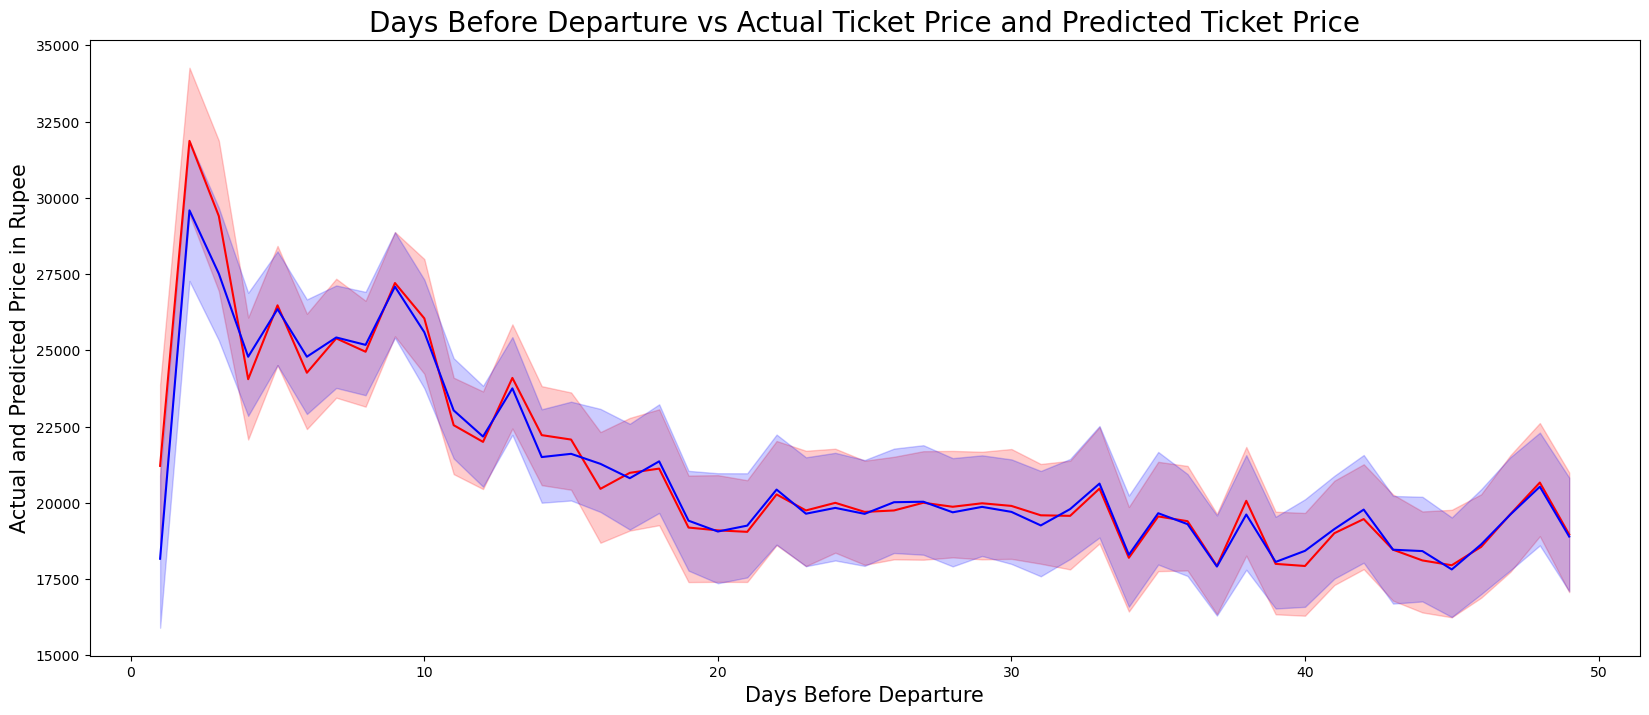

In [32]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Before Departure vs Actual Ticket Price and Predicted Ticket Price',fontsize=20)
#plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Before Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price in Rupee',fontsize=15)
plt.show()

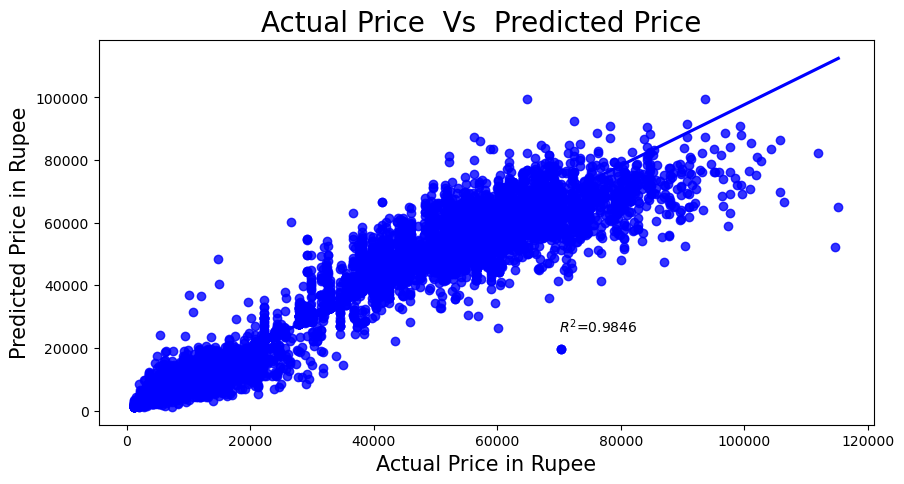

In [33]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='blue')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price in Rupee',fontsize=15)
plt.ylabel('Predicted Price in Rupee',fontsize=15)
plt.text(70000,25000,'$ R^{2} $=' + str(round(0.984565, 4)),fontsize=10)
plt.show()

In [34]:
#cross validation
from sklearn.model_selection import ParameterGrid

# we will loop through nr_states random states so we will return nr_states test scores and nr_states trained models
nr_states = 5
test_scores = np.zeros(nr_states)
final_models = []

# loop through the different random states
for i in range(nr_states):
    print('randoms state '+str(i+1))

#     # first split to separate out the training set
#     X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=42*i)

#     # second split to separate out the validation and test sets
#     X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=42*i)
    
#     # preprocess the sets
#     X_train_prep = prep.fit_transform(X_train)
#     X_val_prep = prep.transform(X_val)
#     X_test_prep = prep.transform(X_test)

    # decide which parameters to tune and what values to try
    # the default value of any parameter not specified here will be used
    param_grid = {
                  'n_neignbors': [1, 5, 10, 30, 100], # no upper bound so the values are evenly spaced in log
                  #'max_features': [0.25, 0.5,0.75,1.0] # linearly spaced because it is between 0 and 1, 0 is omitted
                  } 

    # we save the train and validation scores
    # the validation scores are necessary to select the best model
    # it's optional to save the train scores, it can be used to identify high bias and high variance models
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    models = []
    
    # loop through all combinations of hyperparameter combos
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        print('   ',params) 
        clf = RandomForestRegressor(**params,random_state = 42*i,n_jobs=-1) # initialize the classifier
        clf.fit(ready_X_train,y_train) # fit the model
        models.append(clf) # save it
        # calculate train and validation accuracy scores
        y_train_pred = clf.predict(ready_X_train)
        train_score[p] = accuracy_score(y_train,y_train_pred)
        y_val_pred = clf.predict(ready_X_val)
        val_score[p] = accuracy_score(y_val,y_val_pred)
        print('   ',train_score[p],val_score[p])
    
    # print out model parameters that maximize validation accuracy
    print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.max(val_score))
    # collect and save the best model
    final_models.append(models[np.argmax(val_score)])
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(ready_X_train)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])


randoms state 1
    {'n_neignbors': 1}


TypeError: RandomForestRegressor.__init__() got an unexpected keyword argument 'n_neignbors'

In [ ]:
#split the data and train XGBoost for 5 times
for i in random_state:
    
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=i)
    X_CV, X_test, y_CV, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=i)
   
    X_train_prep = prep.fit_transform(X_train)
    feature_names = preprocessor.get_feature_names_out()
    X_val_prep = prep.transform(X_CV)
    X_test_prep = prep.transform(X_test)
    df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
    df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
    df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    models = []
    
    for j in range(len(ParameterGrid(param_grid))):
        XGB = xgboost.XGBClassifier(random_state = random_state[i],eval_metric='auc')
        XGB.set_params(**ParameterGrid(param_grid)[j])
        XGB.fit(df_train,y_train,early_stopping_rounds=50,eval_set=[(df_CV, y_CV)], verbose=False)
        models.append(XGB)
        y_train_pred = XGB.predict(df_train)
        train_score[j] = accuracy_score(y_train,y_train_pred)
        y_val_pred = XGB.predict(X_val_prep)
        val_score[j] = accuracy_score(y_CV,y_val_pred)

    print('the best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('the corresponding validation score:',np.max(val_score))
   
    final_models.append(models[np.argmax(val_score)])
   
    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])
    con_Ytest = pd.concat([con_Ytest,y_test])
    con_Xtest = pd.concat([con_Xtest,df_test])
    con_Xpred = pd.concat([con_Xpred,pd.DataFrame(y_test_pred)])

In [ ]:
#find best model with hihest test scores
final_models[np.argmax(test_scores)]

In [ ]:
#find the mean and standard deviation of the test accuracy
print("The mean is:", np.mean(test_scores), ", std is:", np.std(test_scores))